In [6]:
import sys

#!{sys.executable} -m pip install gensim==3.8.3 --user
#!{sys.executable} -m pip install fse
#pip install --upgrade gensim

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the 'c:\ml\env\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
from fse.models import SIF
from fse import IndexedList

ImportError: cannot import name 'BaseKeyedVectors' from 'gensim.models.keyedvectors' (c:\ml\env\lib\site-packages\gensim\models\keyedvectors.py)

In [145]:
import os, re, gzip, json, pickle, shutil, random, joblib
from collections import Counter

import numpy as np

from gensim.models import Word2Vec, FastText
from gensim.models import KeyedVectors
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

#from fse.models import SIF
#from fse import IndexedList

from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True
%matplotlib inline

In [5]:
#load training data sample
with gzip.open('../data/1000000_features_x.pkl.gz', 'rb') as f:
    feats = pickle.load(f)
    
with gzip.open('../data/1000000_features_y.pkl', 'rb') as f:
    y = pickle.load(f)
    
feats = feats[:1000000]
y = y[:1000000]

len(feats), len(y)

In [128]:
random.choice(feats)
#user=XX NNP XX, XX ADD XX, XX XX XX    
#link = TAG, XX NNP ADD, XX NNP XX
#hash = $ NNS, $ NN, LS NNS, LS NN, NN NN, NNS NNP, $ NNP, $ JJ
#emoji = XX ADD XX

{'type': 'NormalUser',
 'text': 'Want to meet Miley, Liam, Adam, and Nicholas? more info here: <LINK> (Includes rare picture) CREDIT: <USER>',
 'tokens': 'Want to meet Miley , Liam , Adam , and Nicholas ? more info here : <LINK> ( Includes rare picture ) CREDIT : <USER>',
 'lemmas': 'want to meet miley , liam , adam , and nicholas ? more info here :  ( include rare picture ) credit : ',
 'pos': 'VB TO VB NNP , NNP , NNP , CC NNP . JJR NN RB : ADD NNP XX -LRB- VBZ JJ NN -RRB- NNS : NFP NNP ADD',
 'phrases': 'more_info rare_picture )_CREDIT',
 'entities': ['Miley:PERSON', 'Liam:GPE', 'Nicholas:PERSON'],
 'ent_types': ['GPE', 'PERSON'],
 'hashtags': [],
 'oov_words': 'miley liam',
 'emoji_ratio': 0.0,
 'link_ratio': 0.034482758620689655,
 'user_ratio': 0.034482758620689655,
 'oov_ratio': 0.13333333333333333}

In [144]:
lab2idx={}
idx2lab={}
i=0
for feat in feats:
    if feat['type'] not in lab2idx:
        typ = feat['type']
        lab2idx[typ] = i
        idx2lab[i] = typ
        i+=1
lab2idx

{'NormalUser': 0,
 'NewsFeed': 1,
 'HashtagGamer': 2,
 'LeftTroll': 3,
 'RightTroll': 4,
 'Unknown': 5,
 'Fearmonger': 6,
 'Commercial': 7}

In [125]:
#
# input feature decisions
#

In [70]:
# lemmas
lemmas = [f['lemmas'].strip() for f in feats]

In [24]:
#tokens
tokens = [f['tokens'].strip() for f in feats]

In [ ]:
#
# vectorization choices
#

In [ ]:
# word level

In [134]:
def train_w2v(texts, model_path, vec_dim=128, window=5):
    model = Word2Vec(sentences=texts, vector_size=vec_dim, window=window, min_count=10, workers=4)
    model.train(texts, total_examples=len(texts), epochs=5)

    print('...Storing trained word2vec model')
    model.save(model_path)
    
    for word in ['one', 'cat', 'fun', 'stupid', 'lol']:
        print('close to %s' % word)
        for w,s in model.wv.most_similar(word):
            print('   %s, %.6f' % (w,s))
            
    return model


def train_ft(texts, model_path, vec_dim=128, window=5):
    model = FastText(sentences=texts, vector_size=vec_dim, window=window, min_count=10, workers=4)
    model.train(texts, total_examples=len(texts), epochs=5)

    print('...Storing trained fasttext model')
    model.save(model_path)
    
    for word in ['one', 'cat', 'fun', 'stupid', 'lol']:
        print('close to %s' % word)
        for w,s in model.wv.most_similar(word):
            print('   %s, %.6f' % (w,s))
            
    return model

In [ ]:
lemma_texts = [[t for t in l.split(' ') if t and not t[0]=='#'] for l in lemmas]
token_texts = [[t for t in l.split(' ') if t] for l in tokens]

In [102]:
# w2v, lemmas, dim 128
w2v_lemma_128_model = train_w2v(lemma_texts, model_path='w2v_lemmas_128.model', vec_dim=128, window=5)

...Storing trained sound2vec model


In [123]:
# w2v, lemmas, dim 256
w2v_lemma_256_model = train_w2v(lemma_texts, model_path='w2v_lemmas_256.model', vec_dim=256, window=5)

...Storing trained sound2vec model
close to one
   two, 0.448975
   few, 0.410538
   suitability, 0.407115
   couple, 0.397480
   the, 0.397439
   three, 0.393882
   tip--->the, 0.387105
   all, 0.386697
   a, 0.385734
   ., 0.379138
close to cat
   dog, 0.661289
   pet, 0.608568
   puppy, 0.598654
   kitten, 0.551233
   pup, 0.512244
   squirrel, 0.480887
   kitty, 0.477398
   baby, 0.476338
   kid, 0.458036
   rat, 0.457804
close to fun
   awesome, 0.535683
   great, 0.525589
   wonderful, 0.497025
   lovely, 0.494863
   fabulous, 0.490123
   fab, 0.489692
   productive, 0.488108
   cool, 0.480049
   exciting, 0.462467
   amazing, 0.449394
close to stupid
   dumb, 0.657611
   annoying, 0.578262
   silly, 0.564563
   ignorant, 0.550392
   ridiculous, 0.544230
   rude, 0.542862
   disrespectful, 0.542400
   retarded, 0.535405
   funny, 0.524030
   selfish, 0.517017
close to lol
   lmao, 0.829179
   haha, 0.773410
   hahaha, 0.698409
   smh, 0.673527
   hahahaha, 0.643388
   lmfao, 0.62

In [131]:
#w2v, tokens, dim 128
w2v_token_128_model = train_w2v(token_texts, model_path='w2v_tokens_128.model', vec_dim=128, window=5)

...Storing trained sound2vec model
close to one
   that, 0.544262
   all, 0.542002
   the, 0.527094
   two, 0.524907
   ever, 0.523339
   none, 0.517389
   idea, 0.506869
   ., 0.505605
   probably, 0.505523
   every, 0.505509
close to cat
   dog, 0.793956
   kid, 0.711720
   mom, 0.698905
   puppy, 0.698001
   pig, 0.670382
   neighbor, 0.660032
   girl, 0.659851
   pet, 0.648049
   dick, 0.643885
   kitty, 0.638729
close to fun
   great, 0.696657
   awesome, 0.662878
   nice, 0.654193
   good, 0.634327
   yummy, 0.625666
   fantastic, 0.617634
   wonderful, 0.613989
   lovely, 0.595838
   cool, 0.588377
   amazing, 0.584752
close to stupid
   dumb, 0.842282
   silly, 0.713347
   weird, 0.693167
   nasty, 0.691529
   annoying, 0.683807
   ridiculous, 0.662998
   lame, 0.660129
   bad, 0.658177
   pathetic, 0.651594
   crazy, 0.645935
close to lol
   lmao, 0.868555
   haha, 0.865577
   hahaha, 0.808599
   tho, 0.758458
   Lol, 0.753484
   hehe, 0.726271
   smh, 0.716959
   ugh, 0.71621

In [132]:
#w2v, tokens, 256
w2v_token_256_model = train_w2v(token_texts, model_path='w2v_tokenss_256.model', vec_dim=256, window=5)

...Storing trained sound2vec model
close to one
   One, 0.495533
   that, 0.447047
   ones, 0.444940
   it, 0.441734
   none, 0.438723
   the, 0.438007
   actually, 0.431425
   all, 0.428275
   probably, 0.427818
   a, 0.425618
close to cat
   dog, 0.709076
   kid, 0.627297
   puppy, 0.618728
   pet, 0.614548
   mom, 0.608734
   stomach, 0.589888
   girl, 0.588567
   dad, 0.582434
   kitten, 0.582301
   neighbor, 0.581532
close to fun
   great, 0.595284
   awesome, 0.589718
   nice, 0.569110
   yummy, 0.563595
   wonderful, 0.543489
   good, 0.530406
   lovely, 0.526065
   fabulous, 0.525797
   amazing, 0.521620
   fantastic, 0.519801
close to stupid
   dumb, 0.767547
   silly, 0.637046
   annoying, 0.617520
   ignorant, 0.605048
   nasty, 0.604947
   weird, 0.602731
   retarded, 0.596429
   pathetic, 0.586576
   selfish, 0.586516
   lame, 0.584568
close to lol
   lmao, 0.812920
   haha, 0.812479
   hahaha, 0.723108
   Lol, 0.687083
   smh, 0.660511
   ugh, 0.650724
   omg, 0.643699
  

In [135]:
#fasttext, lemmas, 128
ft_lemmas_128_model = train_ft(lemma_texts, model_path='ft_lemmas_128.model', vec_dim=128, window=5)

...Storing trained fasttext model
close to one
   fone, 0.753366
   -one, 0.743449
   onesie, 0.717138
   none, 0.699021
   noone, 0.676045
   symone, 0.673707
   lone, 0.663446
   thermostat, 0.657201
   4ever, 0.641340
   scone, 0.640689
close to cat
   dog, 0.768655
   catnip, 0.739744
   pet, 0.699854
   kid, 0.699199
   oat, 0.690085
   kitten, 0.685874
   hotdog, 0.685494
   goat, 0.682881
   babysitter, 0.682475
   dogs, 0.680616
close to fun
   awesome, 0.644397
   great, 0.618375
   nice, 0.616268
   coool, 0.614138
   wonderful, 0.609000
   gruesome, 0.606013
   funky, 0.597525
   fabulous, 0.596437
   lovely, 0.592923
   greasy, 0.591446
close to stupid
   stupidly, 0.866256
   stupidity, 0.755430
   annoying, 0.725875
   hated, 0.725607
   unfunny, 0.713974
   dumb, 0.696041
   ridiculous, 0.684873
   disgusting, 0.683948
   weirdly, 0.665311
   silly, 0.664605
close to lol
   lolol, 0.952630
   lololol, 0.913921
   .lol, 0.910261
   lol-, 0.888087
   lolololol, 0.873913
  

In [136]:
#fasttext, lemmas, 256
ft_lemmas_256_model = train_ft(lemma_texts, model_path='ft_lemmas_256.model', vec_dim=256, window=5)

...Storing trained fasttext model
close to one
   fone, 0.701703
   -one, 0.693428
   onesie, 0.655465
   symone, 0.639824
   none, 0.617256
   lone, 0.604999
   noone, 0.601255
   cone, 0.600139
   scone, 0.598966
   tone, 0.580369
close to cat
   catnip, 0.720033
   dog, 0.709774
   doggy, 0.607227
   catfish, 0.606916
   bearcat, 0.605866
   doggie, 0.604154
   pet, 0.595842
   cato, 0.593532
   wildcat, 0.592099
   dogs, 0.587409
close to fun
   funky, 0.587895
   awesome, 0.574896
   funn, 0.568032
   funk, 0.555044
   great, 0.547545
   lovely, 0.536375
   greatful, 0.533253
   wonderful, 0.531241
   greasy, 0.529379
   gruesome, 0.521142
close to stupid
   stupidly, 0.853046
   stupidity, 0.736236
   unfunny, 0.646589
   dumb, 0.620469
   hated, 0.584757
   funny, 0.574486
   stoopid, 0.573655
   annoying, 0.564437
   weirdly, 0.556444
   dumbe, 0.550423
close to lol
   lolol, 0.940002
   .lol, 0.899065
   lololol, 0.892308
   lol-, 0.877095
   lolololol, 0.847052
   lolzz, 0.81

In [ ]:
# document level

In [204]:
def plot_tsne(vecs, lab_idxs, idx2lab):
    lab2idx = {l:i for i,l in idx2lab.items()}
    tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=2000)
    tsne_results = tsne.fit_transform(vecs)

    vis_x = tsne_results[:,0]
    vis_y = tsne_results[:,1]
    
    num_labs = len(idx2lab)
    colors = ['red','aqua','orange','green','blue','black','purple','yellow','magenta','cyan'][:num_labs]

    fig = plt.figure(figsize=(14,14))
    plt.scatter(vis_x, vis_y, c=[colors[i] for i in lab_idxs], cmap=matplotlib.colors.ListedColormap(colors))

    cb = plt.colorbar()
    loc = np.arange(0, max(lab_idxs)+1, (max(lab_idxs)+1)/float(num_labs))
    cb.set_ticks(loc)
    cb.set_ticklabels([idx2lab[i] for i in range(num_labs)])

In [208]:
#sum weighted word vecs by tfidf

tfidf_vectorizer = TfidfVectorizer(max_features=100000, stop_words="english")
tfidf = tfidf_vectorizer.fit_transform(lemmas)
tfidf_vocab = tfidf_vectorizer.get_feature_names()
tfidf.shape

(1000000, 100000)

In [210]:
#get tfidf score for certain words in a doc
lemmas[0], tfidf[0, tfidf_vocab.index('rt')], tfidf[0, tfidf_vocab.index('junie')]

('rt :  good to see junie browning back to be junie browning ( video ):',
 0.1019326764879282,
 0.7282515582684614)

In [213]:
'donkeykong' in w2v_lemma_128_model.wv

False

In [214]:
wts = []
vecs = []
eps = 0.001
i=0
for tk in lemmas[i].split(' '):
    if tk not in w2v_lemma_128_model.wv:
        continue
    
    vecs.append(w2v_lemma_128_model.wv[tk])
    
    if tk not in tfidf_vocab:
        wts.append(eps)
    else:
        wts.append(tfidf[i, tfidf_vocab.index(tk)])
wttl = sum(wts)
wts, [w/wttl for w in wts]

([0.1019326764879282,
  0.001,
  0.12757042787237405,
  0.001,
  0.001,
  0.7282515582684614,
  0.6498053813724538,
  0.001,
  0.001,
  0.001,
  0.7282515582684614,
  0.6498053813724538,
  0.001,
  0.14400746374901582,
  0.001],
 [0.0324872138769452,
  0.00031871245802902695,
  0.04065828463901902,
  0.00031871245802902695,
  0.00031871245802902695,
  0.23210284419921046,
  0.207101070337704,
  0.00031871245802902695,
  0.00031871245802902695,
  0.00031871245802902695,
  0.23210284419921046,
  0.207101070337704,
  0.00031871245802902695,
  0.045896972745974825,
  0.00031871245802902695])

In [216]:
np.sum([vecs[i]*wts[i] for i in range(len(wts))], axis=0)

array([-9.61778685e-02,  2.49768481e-01, -1.31347492e-01, -5.10631204e-01,
        2.16277391e-01, -5.12406886e-01,  1.70752153e-01,  1.97837621e-01,
        1.82599321e-01,  9.89320874e-02,  1.05099738e+00, -5.71051717e-01,
       -5.67875922e-01,  1.60520732e-01, -5.20851552e-01,  1.21258639e-01,
       -6.80999637e-01, -6.86711371e-01,  5.43309391e-01,  4.44449753e-01,
        5.50002992e-01,  1.54414833e+00,  7.57352635e-02, -1.46414697e+00,
       -8.56796443e-01,  4.44513232e-01, -2.93847710e-01, -2.63071954e-01,
       -4.23857540e-01,  5.56033254e-01, -4.91707772e-02, -5.29319823e-01,
       -5.68477631e-01, -2.03987136e-01, -9.20484662e-01,  5.94548762e-01,
        1.24010932e+00,  8.01898658e-01, -7.13273957e-02,  4.37055618e-01,
       -2.64342576e-01,  8.01478267e-01, -2.97740519e-01, -5.15217245e-01,
        3.27695981e-02,  8.84052098e-01, -2.52552301e-01, -3.74814272e-01,
        3.58714610e-01,  3.81080806e-01,  1.11299362e-02, -3.25701743e-01,
        1.14544463e+00,  

In [231]:
def get_sum_tfidf_weighted_word_vectors(texts, word_model, tfidf, tfidf_vocab, out_path):
    sum_w2v_vecs = []
    #labs = []
    file_idx = 0
    eps = 0.01
    
    for i in range(len(texts)):
        wts = []
        vecs = []
        
        for tk in texts[i].split(' '):
            if tk not in word_model.wv:
                continue

            vecs.append(word_model.wv[tk])

            if tk not in tfidf_vocab:
                wts.append(eps)
            else:
                wts.append(tfidf[i, tfidf_vocab.index(tk)])
        
        if not vecs:
            #just add random word vec
            idx = random.randint(0,len(word_model.wv)-1)
            sum_w2v_vecs.append(word_model.wv[idx])
        else:
            wt_ttl = sum(wts)
            wts = [w/wt_ttl for w in wts]
            sum_w2v_vecs.append(np.sum([vecs[i]*wts[i] for i in range(len(wts))], axis=0))
        #labs.append(labels[i])
        
        if i and i%25000==0:
            print('%d, storing %s_%d.npy' % (i, out_path, file_idx))
            np.save('%s_%d.npy' % (out_path, file_idx), np.vstack(sum_w2v_vecs))
            file_idx+=1
            sum_w2v_vecs = []
            
    if sum_w2v_vecs:
        print('storing last %s_%d.npy' % (out_path, file_idx))
        np.save('%s_%d.npy' % (out_path, file_idx), np.vstack(sum_w2v_vecs))

In [ ]:
out_path = 'sum_tfidf_weighted_w2v_lemma_128.npy'
get_sum_tfidf_weighted_word_vectors(lemmas, w2v_lemma_128_model, tfidf, tfidf_vocab, out_path)

25000, storing sum_tfidf_weighted_w2v_lemma_128.npy_0.npy
50000, storing sum_tfidf_weighted_w2v_lemma_128.npy_1.npy
75000, storing sum_tfidf_weighted_w2v_lemma_128.npy_2.npy
100000, storing sum_tfidf_weighted_w2v_lemma_128.npy_3.npy
125000, storing sum_tfidf_weighted_w2v_lemma_128.npy_4.npy
150000, storing sum_tfidf_weighted_w2v_lemma_128.npy_5.npy
175000, storing sum_tfidf_weighted_w2v_lemma_128.npy_6.npy
200000, storing sum_tfidf_weighted_w2v_lemma_128.npy_7.npy
225000, storing sum_tfidf_weighted_w2v_lemma_128.npy_8.npy
250000, storing sum_tfidf_weighted_w2v_lemma_128.npy_9.npy
275000, storing sum_tfidf_weighted_w2v_lemma_128.npy_10.npy
300000, storing sum_tfidf_weighted_w2v_lemma_128.npy_11.npy
325000, storing sum_tfidf_weighted_w2v_lemma_128.npy_12.npy
350000, storing sum_tfidf_weighted_w2v_lemma_128.npy_13.npy
375000, storing sum_tfidf_weighted_w2v_lemma_128.npy_14.npy
400000, storing sum_tfidf_weighted_w2v_lemma_128.npy_15.npy
425000, storing sum_tfidf_weighted_w2v_lemma_128.npy_

In [ ]:
#doc2vec

In [172]:
lemma_docs = [TaggedDocument(feat['lemmas'].split(' '), tags=[feat['type']]) for feat in feats[:1000000]]
lemma_docs[0]

TaggedDocument(words=['rt', ':', '', 'good', 'to', 'see', 'junie', 'browning', 'back', 'to', 'be', 'junie', 'browning', '(', 'video', '):', ''], tags=['NormalUser'])

In [173]:
d2v_lemmas_128_model = Doc2Vec(lemma_docs, vector_size=128, window=5, min_count=10, workers=4)
d2v_lemmas_128_model.save('d2v_lemmas_128.model')

In [174]:
lab_vecs = {}
for lab in lab2idx.keys():
    lab_vecs[lab] = d2v_lemmas_128_model.dv[lab]

In [176]:
len(feats)

1000000

In [177]:
def data_to_doc2vec_vectors(feats):
    labs = []
    predicted = []
    d2v_lemmas_128_vecs = []
    cor=0
    ttl=0
    file_idx=0
    
    for i,feat in enumerate(feats):
        v = d2v_lemmas_128_model.infer_vector(feat['lemmas'].split(' '))
        d2v_lemmas_128_vecs.append(v)
        labs.append(feat['type'])
        for l,sc in d2v_lemmas_128_model.dv.most_similar(v, topn=1): #positive=[v]
            predicted.append(l)
            #print(feat['type'], l, sc, '\n')
            if feat['type']==l:
                cor+=1
        ttl+=1

        if ttl % 10000 == 0:
            print(ttl, cor, cor/ttl)

        if i and i%100000==0:
            print('storing d2v_lemmas_128_%d.npy' % file_idx)
            np.save('d2v_lemmas_128_%d.npy' % file_idx, np.vstack(d2v_lemmas_128_vecs))
            file_idx+=1
            d2v_lemmas_128_vecs = []
            
    if d2v_lemmas_128_vecs:
        print('storing d2v_lemmas_128_%d.npy' % file_idx)
        np.save('d2v_lemmas_128_%d.npy' % file_idx, np.vstack(d2v_lemmas_128_vecs))
    
    print(classification_report(labs, predicted, target_names=sorted(list(lab2idx.keys()))))
    
    bin_labs = [l if l=='NormalUser' else 'TrollUser' for l in labs]
    bin_preds = [l if l=='NormalUser' else 'TrollUser' for l in predicted]
    print(classification_report(bin_labs, bin_preds, target_names=['NormalUser', 'TrollUser']))

    return labs, predicted

10000 3883 0.3883
20000 7781 0.38905
30000 11552 0.38506666666666667
40000 15372 0.3843
50000 19155 0.3831
60000 23027 0.3837833333333333
70000 26797 0.3828142857142857
80000 30655 0.3831875
90000 34506 0.3834
100000 38295 0.38295
storing d2v_lemmas_128_0.npy
110000 42130 0.383
120000 46005 0.383375
130000 49892 0.3837846153846154
140000 53633 0.3830928571428571
150000 57458 0.38305333333333336
160000 61304 0.38315
170000 65166 0.38332941176470586
180000 69087 0.38381666666666664
190000 72887 0.3836157894736842
200000 76752 0.38376
storing d2v_lemmas_128_1.npy
210000 80614 0.3838761904761905
220000 84431 0.38377727272727274
230000 88303 0.38392608695652175
240000 92137 0.38390416666666666
250000 95960 0.38384
260000 99832 0.3839692307692308
270000 103683 0.38401111111111114
280000 107574 0.38419285714285717
290000 111416 0.38419310344827584
300000 115279 0.38426333333333335
storing d2v_lemmas_128_2.npy
310000 119117 0.38424838709677417
320000 122997 0.384365625
330000 126850 0.38439393

In [207]:
lem =feats[0]['lemmas'].split(' ')
print(lem)
d2v_lemmas_128_model.infer_vector(lem)

['rt', ':', '', 'good', 'to', 'see', 'junie', 'browning', 'back', 'to', 'be', 'junie', 'browning', '(', 'video', '):', '']


array([-5.62090427e-02, -1.25061885e-01, -2.36839186e-02,  1.24107070e-01,
       -5.37913665e-02,  7.49679431e-02, -6.54570311e-02, -5.02423681e-02,
       -7.79599771e-02,  4.75835614e-03, -1.63297489e-01, -9.65543240e-02,
       -3.40601355e-02, -3.44109014e-02, -6.78320527e-02, -6.64863437e-02,
       -1.08258940e-01,  4.64118675e-05,  7.45863318e-02, -5.56372777e-02,
       -2.15077940e-02, -6.28877208e-02,  6.61435276e-02,  1.97646409e-01,
        5.66402078e-02, -6.84984550e-02, -9.32702273e-02, -2.83564199e-02,
       -8.95558205e-03, -1.91887617e-02,  3.28908823e-02, -9.61399451e-02,
        5.19491872e-03,  1.50892019e-01,  3.63575108e-02, -1.12713151e-01,
       -7.03306347e-02, -1.98326875e-02,  1.06070288e-01, -1.70871038e-02,
       -4.93997447e-02, -9.33613777e-02, -2.24272478e-02, -3.49480398e-02,
       -5.61876483e-02,  1.17745407e-01,  1.74148902e-01,  2.72753835e-02,
        1.92755952e-01, -1.28324181e-01, -1.29275888e-01,  1.05691440e-01,
        1.84249550e-01, -

In [179]:
c= Counter(labs)
c

Counter({'NormalUser': 500000,
         'NewsFeed': 190952,
         'HashtagGamer': 37957,
         'LeftTroll': 86389,
         'RightTroll': 178738,
         'Unknown': 2516,
         'Fearmonger': 3109,
         'Commercial': 339})

In [180]:
print(classification_report(labs, predicted, target_names=sorted(list(lab2idx.keys()))))
#Normal: .87/.47/.61  troll:

              precision    recall  f1-score   support

  Commercial       0.00      0.67      0.00       339
  Fearmonger       0.03      0.63      0.05      3109
HashtagGamer       0.86      0.55      0.67     37957
   LeftTroll       0.62      0.18      0.28     86389
    NewsFeed       0.76      0.26      0.38    190952
  NormalUser       0.87      0.47      0.61    500000
  RightTroll       0.76      0.34      0.47    178738
     Unknown       0.00      0.67      0.01      2516

    accuracy                           0.38   1000000
   macro avg       0.49      0.47      0.31   1000000
weighted avg       0.80      0.38      0.51   1000000



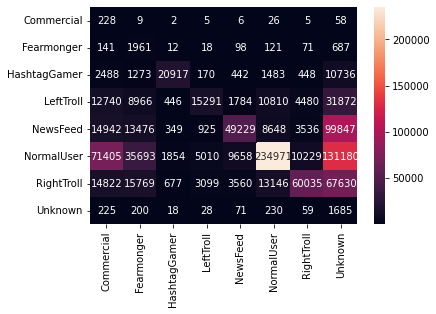

In [190]:
import seaborn as sns
cm = confusion_matrix(labs, predicted)
f = sns.heatmap(cm, annot=True, fmt='d', xticklabels=sorted(list(lab2idx.keys())), yticklabels=sorted(list(lab2idx.keys())))

In [182]:
bin_labs = [l if l=='NormalUser' else 'TrollUser' for l in labs]
bin_preds = [l if l=='NormalUser' else 'TrollUser' for l in predicted]
print(classification_report(bin_labs, bin_preds, target_names=['NormalUser', 'TrollUser']))
#Normal: .87, .47, .61
#Troll: .64, .93, .76
#acc .7, prf: 0.75, 0.7, 0.68

              precision    recall  f1-score   support

  NormalUser       0.87      0.47      0.61    500000
   TrollUser       0.64      0.93      0.76    500000

    accuracy                           0.70   1000000
   macro avg       0.75      0.70      0.68   1000000
weighted avg       0.75      0.70      0.68   1000000



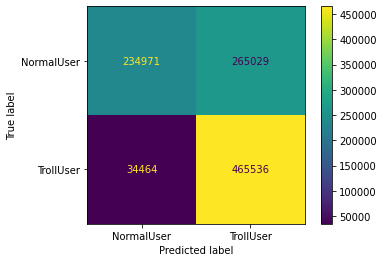

In [188]:
cm = confusion_matrix(bin_labs, bin_preds) #, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['NormalUser', 'TrollUser'])
cmd.plot()

In [192]:
d2v_lemmas_128_vecs_100000 = np.load('d2v_lemmas_128_0.npy')
labs_100000 = labs[:100001]
d2v_lemmas_128_vecs_100000.shape

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.087s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.140113
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.301727
[t-SNE] KL divergence after 2000 iterations: 2.430488


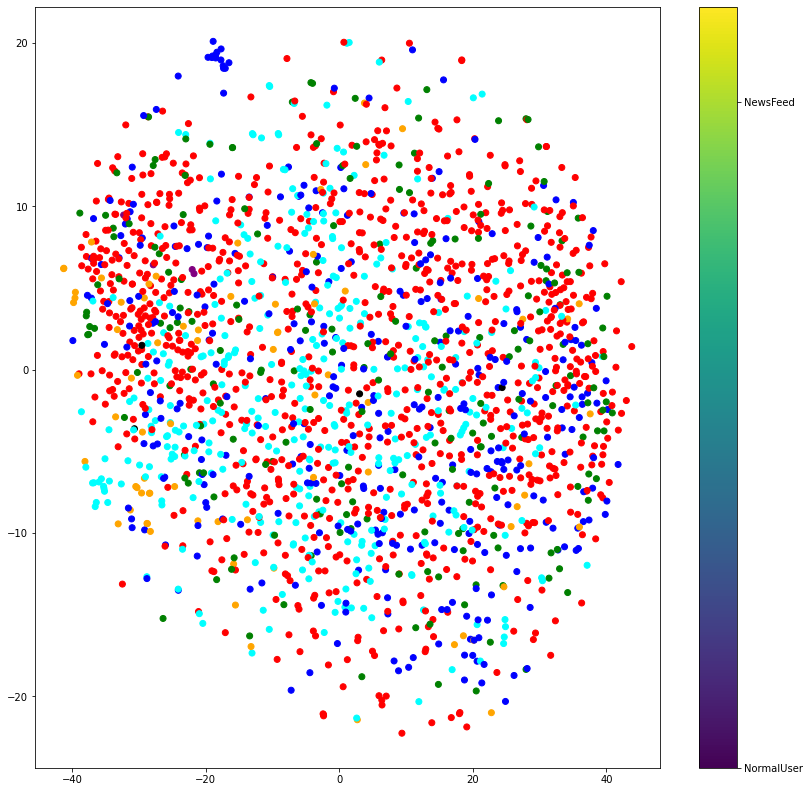

In [206]:
plot_tsne(d2v_lemmas_128_vecs_100000[:2000], [lab2idx[l] for l in labs_100000[:2000]], idx2lab)

In [ ]:
# scaled inverse frequency sentence embeddings

In [72]:
from collections import Counter

In [78]:
lemma_vocab_cts = Counter(' '.join(lemmas).split(' '))
len(lemma_vocab_cts)

273058

In [ ]:
def get_inverse_frequency_word_weights(vocab_cts, alpha=1e-3):
    corpus_size = 0
    wt = np.zeros(len(vocab_cts))
    words = []
    i=0
    for word, count in vocab_cts.items():
        words.append(word)
        corpus_size += count
        wt[i] = count
        i+=1
    wt /= corpus_size

    wt = (alpha / (alpha + wt))
    
    word_weights = {word:wt[i].item() for i,word in enumerate(words)}
    
    return word_weights

In [ ]:
#needed for inverse frequency word vector weighting
word_weights = get_inverse_frequency_word_weights(vocab_cts)

with open('lemma_wts.pkl', 'wb') as o:
    pickle.dump(word_weights, o)

In [ ]:
def scale_word_vecs_by_inverse_frequency(w2v_model, word_weights):
    '''Scale word vecs by inverse frequency'''
    word_vecs = {}
    
    for word, wt in word_weights.items():
        word_vecs[word] = w2v_model.wv[word] * wt
        
    return word_vecs

In [ ]:
# scale the word vecs by inverse frequency
sif_word_vecs = scale_word_vecs_by_inverse_frequency(w2v_model, word_weights)

In [ ]:
def get_all_sum_scaled_word_vecs(docs, sif_word_vecs):
    '''Sum the scaled word vecs and stack resulting doc vecs'''
    vecs = []
    for doc in docs:
        vec = get_sum_scaled_word_vecs(doc, sif_word_vecs)
        vecs.append(vec)
    vecs = np.vstack(vecs)
    
    return vecs


def get_sum_scaled_word_vecs(words, sif_word_vecs):
    '''Sum the scaled word vecs in a single song'''
    vecs = np.vstack([sif_word_vecs[word] for word in words])
    return np.sum(vecs, axis=0)/vecs.shape[0]

In [ ]:
# average the weighted word vecs to get a song vec for each song
sfe_lemmas_128_vecs = get_all_sum_scaled_word_vecs(lemmas, sif_word_vecs)
sfe_lemmas_128_vecs.shape

In [ ]:
def remove_first_singular_values(vecs, svd_path):
    '''Train SVD and remove projection of first singular vec from the vector set.
    This is done because of the assumption of a "default context" present in the sequence to be aggregated.'''
    if os.path.exists(svd_path):
        print('Loading trained SVD model')
        svd = joblib.load(svd_path)
    else:
        svd = TruncatedSVD(n_components=1, n_iter=10, random_state=42, algorithm="randomized")
        svd.fit(vecs)
        joblib.dump(svd, svd_path)

    sing_vecs = svd.components_

    #subtract u*u.T*v from sent vecs
    vecs -= vecs.dot(sing_vecs.T) * sing_vecs
    
    return vecs, svd

In [ ]:
# remove the first singular component from each song vec to decorrelate their "default context"
svd_path = 'sfe_lemmas_128_vecs.joblib'
sfe_lemmas_128_vecs, svd = remove_first_singular_values(sfe_lemmas_128_vecs, svd_path)